In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


from sklearn.cluster import KMeans


In [3]:
data = pd.read_json('webpage/films.json')
#data = data[['genres','plot','primaryTitle']]
X = np.array(data['plot'].copy()) #use cosine similarity on film plot

model = SentenceTransformer('distilbert-base-nli-mean-tokens') #analyse each film plot in dataset
embeddings = model.encode(X, show_progress_bar=True) #RESEARCH
cos_sim_data = pd.DataFrame(cosine_similarity(embeddings)) #RESEARCH
cos_sim_data # plot films(index) by similarity


Batches:   0%|          | 0/1784 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,57051,57052,57053,57054,57055,57056,57057,57058,57059,57060
0,1.000000,0.549985,0.470084,0.593523,0.685091,0.666328,0.702951,0.539979,0.712889,0.720500,...,0.547373,0.577525,0.598714,0.590086,0.638559,0.726925,0.677061,0.693247,0.603266,0.762778
1,0.549985,1.000000,0.350558,0.488664,0.663013,0.598500,0.672464,0.618689,0.669583,0.601266,...,0.251838,0.542478,0.609751,0.623910,0.572713,0.520778,0.614591,0.594124,0.544974,0.644189
2,0.470084,0.350558,1.000000,0.397711,0.537982,0.566246,0.512457,0.595904,0.520379,0.616584,...,0.469369,0.650599,0.526969,0.647222,0.555311,0.412059,0.502397,0.598745,0.660899,0.641090
3,0.593523,0.488664,0.397711,1.000000,0.661252,0.706641,0.535707,0.585068,0.544549,0.618842,...,0.498599,0.389869,0.602636,0.527618,0.655896,0.687126,0.637481,0.548368,0.520876,0.660371
4,0.685091,0.663013,0.537982,0.661252,1.000000,0.811315,0.728506,0.643923,0.761829,0.767817,...,0.530833,0.708882,0.661617,0.721779,0.670682,0.699165,0.814708,0.691721,0.661330,0.794485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57056,0.726925,0.520778,0.412059,0.687126,0.699165,0.657804,0.681993,0.561082,0.739722,0.717908,...,0.514164,0.542709,0.611301,0.544345,0.627199,1.000000,0.706144,0.686602,0.574824,0.718031
57057,0.677061,0.614591,0.502397,0.637481,0.814708,0.702162,0.682823,0.612467,0.700147,0.759781,...,0.586009,0.664898,0.646985,0.636962,0.624362,0.706144,1.000000,0.607448,0.591359,0.768061
57058,0.693247,0.594124,0.598745,0.548368,0.691721,0.698280,0.747572,0.670936,0.784969,0.724065,...,0.524588,0.697298,0.756063,0.719696,0.661806,0.686602,0.607448,1.000000,0.791772,0.794522
57059,0.603266,0.544974,0.660899,0.520876,0.661330,0.718291,0.656975,0.693113,0.670968,0.680400,...,0.393001,0.666621,0.767642,0.720000,0.623804,0.574824,0.591359,0.791772,1.000000,0.677876


Text(0, 0.5, 'Counts')

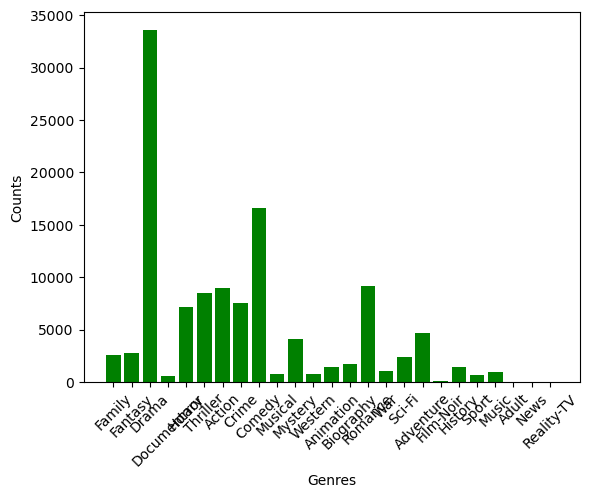

In [6]:
counts = dict()
for i in range(len(data)):
   for g in data.loc[i,'genres'].split(','):
      if g not in counts:
         counts[g] = 1
      else:
         counts[g] = counts[g] + 1
# create a bar chart
plt.bar(list(counts.keys()), counts.values(), color='g')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Counts')

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['plot'])

# # Compute cosine similarity based on the TF-IDF matrix
# cosine_sim_content = linear_kernel(tfidf_matrix, tfidf_matrix)

# # Convert the cosine similarity matrix into a DataFrame
# cos_sim_content_data = pd.DataFrame(cosine_sim_content, index=data.index, columns=data.index)


In [6]:
def get_film_index(film_name):
    try:
        index = data[data['primaryTitle'] == film_name].index[0]
        return index
    except IndexError:
        print(f"Film '{film_name}' not found")
        return None

def give_recommendations(index):

  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:10] #get index of similar films
  movies_recomm =  data['primaryTitle'].loc[index_recomm].values #get names of similar films
  result = {'Movies':movies_recomm,'Index':index_recomm} #dictionary of film name to index

  print('movie: %s'%(data['primaryTitle'].loc[index]))
  print('plot: %s'%(data['plot'].loc[index]))
  print('genres: %s'%(data['genres'].loc[index]))
  print('')

  # Print the plot and genres of each recommended movie
  k = 1
  for movie_index in index_recomm:
    similarity = cos_sim_data.loc[index, movie_index] * 100
    movie = data['primaryTitle'].loc[movie_index]
    plot_q = data['plot'].loc[movie_index]
    genre_q = data['genres'].loc[movie_index]

    print('%i: %s (%.1f%%)' % (k, movie, similarity))
    print('Plot: %s ' % plot_q)
    print('Genre: %s' % genre_q)
    print('')

    k += 1

  return result

  

In [ ]:
give_recommendations(get_film_index('The Godfather'))